In [68]:
import scipy.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
data=scipy.io.loadmat("train_both2.mat")
train_data=data['train_data']
train_targets=data['train_targets']
train_targets=train_targets/0.1;

print(train_data.shape)
print(train_targets.shape)

(1000, 6)
(1000, 300)


In [74]:
def get_new_model(input_shape):
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(64,activation='relu', 
                              input_shape=input_shape),
        
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1000,activation='relu'),
        tf.keras.layers.Dense(300,activation='sigmoid'),
        
    ])
    return model




In [75]:
model=get_new_model(train_data[0].shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              129000    
_________________________________________________________________
dense_12 (Dense)             (None, 300)               300300    
Total params: 438,068
Trainable params: 438,068
Non-trainable params: 0
_________________________________________________________________


In [76]:
def compile_model(model):
    model.compile(optimizer='adam',loss='mse')

compile_model(model)

In [77]:
def train_model(model,train_data,train_targets,epochs):
    history=model.fit(train_data,train_targets,epochs=epochs,
                     verbose=2)
    
    return history
    

In [78]:
history=train_model(model,train_data,train_targets,epochs=200)

Epoch 1/200
32/32 - 0s - loss: 0.3878
Epoch 2/200
32/32 - 0s - loss: 0.2579
Epoch 3/200
32/32 - 0s - loss: 0.1925
Epoch 4/200
32/32 - 0s - loss: 0.1801
Epoch 5/200
32/32 - 0s - loss: 0.1740
Epoch 6/200
32/32 - 0s - loss: 0.1726
Epoch 7/200
32/32 - 0s - loss: 0.1704
Epoch 8/200
32/32 - 0s - loss: 0.1690
Epoch 9/200
32/32 - 0s - loss: 0.1687
Epoch 10/200
32/32 - 0s - loss: 0.1673
Epoch 11/200
32/32 - 0s - loss: 0.1668
Epoch 12/200
32/32 - 0s - loss: 0.1657
Epoch 13/200
32/32 - 0s - loss: 0.1653
Epoch 14/200
32/32 - 0s - loss: 0.1650
Epoch 15/200
32/32 - 0s - loss: 0.1643
Epoch 16/200
32/32 - 0s - loss: 0.1639
Epoch 17/200
32/32 - 0s - loss: 0.1634
Epoch 18/200
32/32 - 0s - loss: 0.1633
Epoch 19/200
32/32 - 0s - loss: 0.1628
Epoch 20/200
32/32 - 0s - loss: 0.1625
Epoch 21/200
32/32 - 0s - loss: 0.1627
Epoch 22/200
32/32 - 0s - loss: 0.1622
Epoch 23/200
32/32 - 0s - loss: 0.1621
Epoch 24/200
32/32 - 0s - loss: 0.1621
Epoch 25/200
32/32 - 0s - loss: 0.1619
Epoch 26/200
32/32 - 0s - loss: 0.

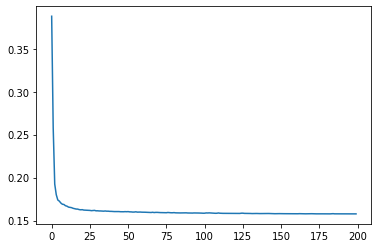

In [79]:
plt.plot(history.history['loss'])